# Análise Exploratória de Eventos Cardiovasculares

Este notebook investiga tendências, variabilidade e o impacto da pandemia de COVID-19 sobre **internações (morbidade)** e **óbitos (mortalidade)** cardiovasculares no Brasil (2018–2025).

## Etapas exploradas:

- Verificação da qualidade e consistência dos dados;
- Estatísticas descritivas iniciais (média, desvio-padrão, mínimos, máximos);
- Séries temporais com linhas de tendência (regressão linear);
- Identificação de padrões sazonais e anomalias (picos e quedas);
- Análise de instabilidade usando o coeficiente de variação (pré e pós-pandemia).


## Configurações Iniciais

- Importação das bibliotecas necessárias (`pandas`, `numpy`, `matplotlib`, `seaborn`, `statsmodels`, `locale`);
- Carregamento de módulos próprios (`carregamento`, `visualizacao`);
- Ajuste do locale do sistema para `pt_BR`;
- Configuração do estilo visual dos gráficos;
- Carregamento do dicionário `dados` com as tabelas tratadas de morbidade e mortalidade.


In [1]:
# 02_analise_exploratoria.ipynb

# Bibliotecas principais
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import locale


# Adiciona o diretório de scripts ao path para importar funções
from scripts.carregamento import carregar_dados_tratados
from scripts.visualizacao import plotar_comparativo_eventos

# Define o locale para datas em português
try:
    locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')  # Linux/Mac
except:
    locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')  # Windows

# Configura estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Carrega todos os dados tratados organizados por categoria
dados = carregar_dados_tratados("../dados_tratados")

## Validação e Estatísticas Descritivas

Para ambas as categorias:

- `df.info()`: verificação de valores nulos e tipos das colunas;
- `df.describe()`: cálculo de estatísticas básicas;
- `df.head()`: conferência do formato dos dados e primeiras linhas.

In [2]:
# Análise geral dos dados de morbidade e mortalidade

for categoria in ["morbidade", "mortalidade"]:
    print(f"\n=== Análise dos dados de {categoria.upper()} ===\n")

    for nome, df in dados[categoria].items():
        print(f"\n--- {nome} ---")

        print("\n[ info() ]")
        print(df.info())

        print("\n[ describe() ]")
        print(df.describe())

        print("\n[ head() ]")
        print(df.head())


=== Análise dos dados de MORBIDADE ===


--- internacoes_arritmias_cardiacas ---

[ info() ]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            81 non-null     datetime64[ns]
 1   Menor 1 ano     81 non-null     int64         
 2   1 a 4 anos      81 non-null     int64         
 3   5 a 9 anos      81 non-null     int64         
 4   10 a 14 anos    81 non-null     int64         
 5   15 a 19 anos    81 non-null     int64         
 6   20 a 29 anos    81 non-null     int64         
 7   30 a 39 anos    81 non-null     int64         
 8   40 a 49 anos    81 non-null     int64         
 9   50 a 59 anos    81 non-null     int64         
 10  60 a 69 anos    81 non-null     int64         
 11  70 a 79 anos    81 non-null     int64         
 12  80 anos e mais  81 non-null     int64         
 13  Total           81

### Comentários sobre as estatísticas descritivas iniciais

- `info()`: ausência de valores nulos confirmada;
- `describe()`: mínimos em zero (esperado para contagens); valores máximos elevados para arritmias, sugerindo picos mensais;
- `head()`: primeiros registros com formato coerente com o esperado.


## Análise Visual Inicial de Mortalidade

Séries temporais dos óbitos por:

- AVC
- Infarto
- Insuficiência cardíaca
- Miocardite
- Trombose

Para cada uma:

- Remoção de valores ausentes;
- Conversão de datas para formato adequado;
- Aplicação de regressão linear para visualização de tendências.

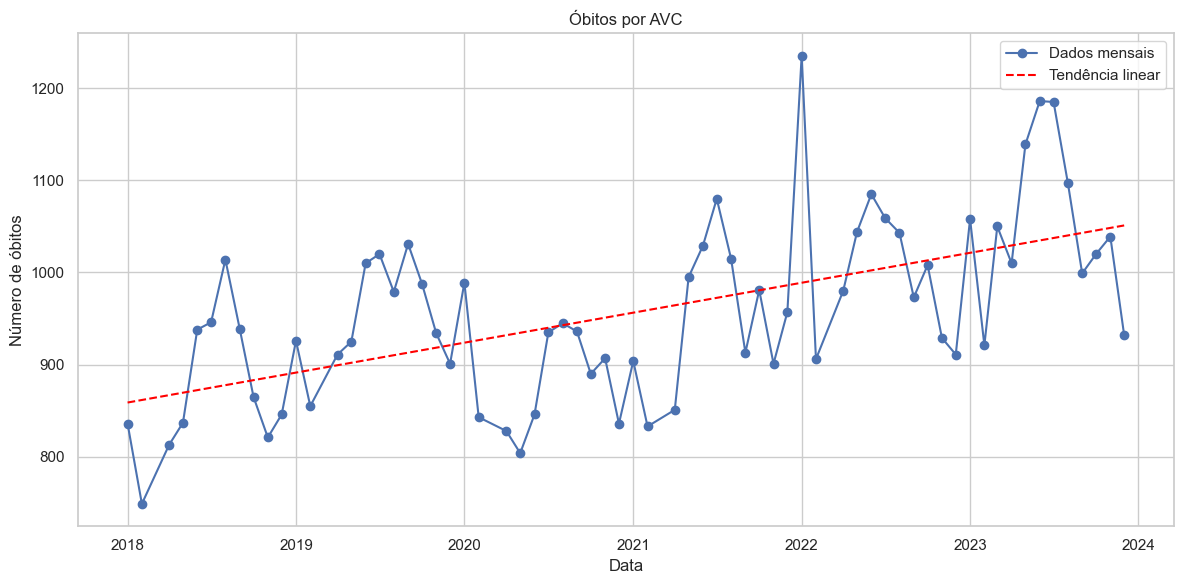

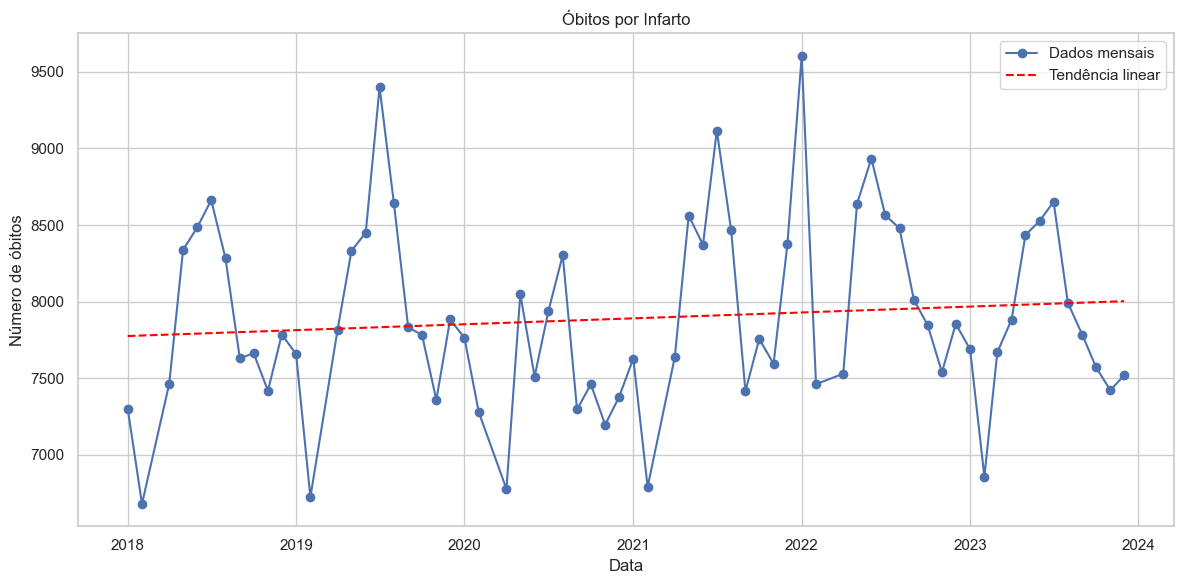

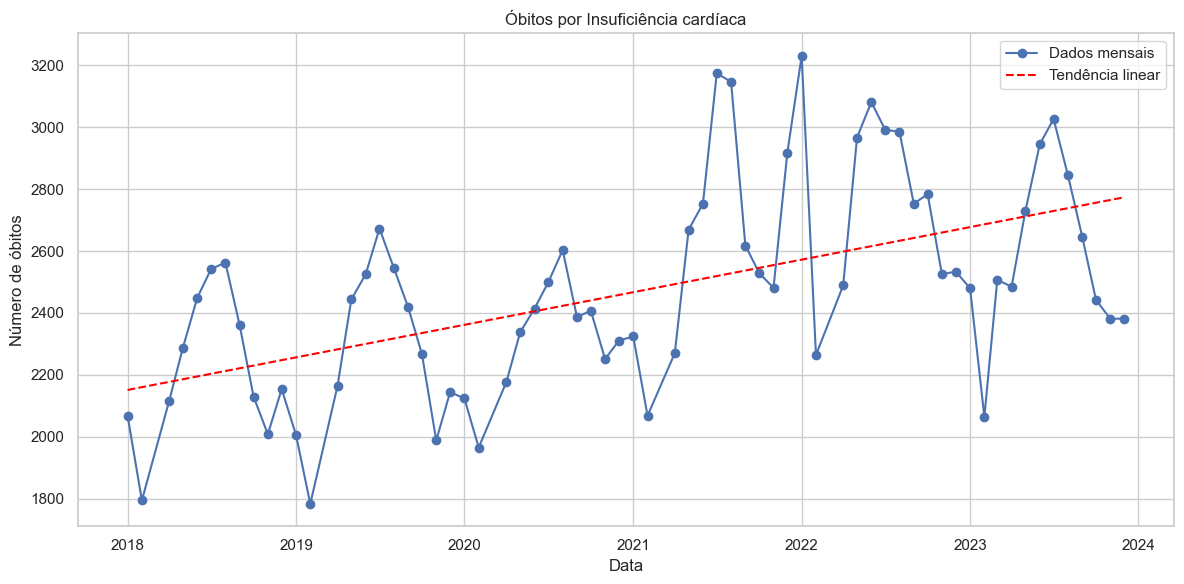

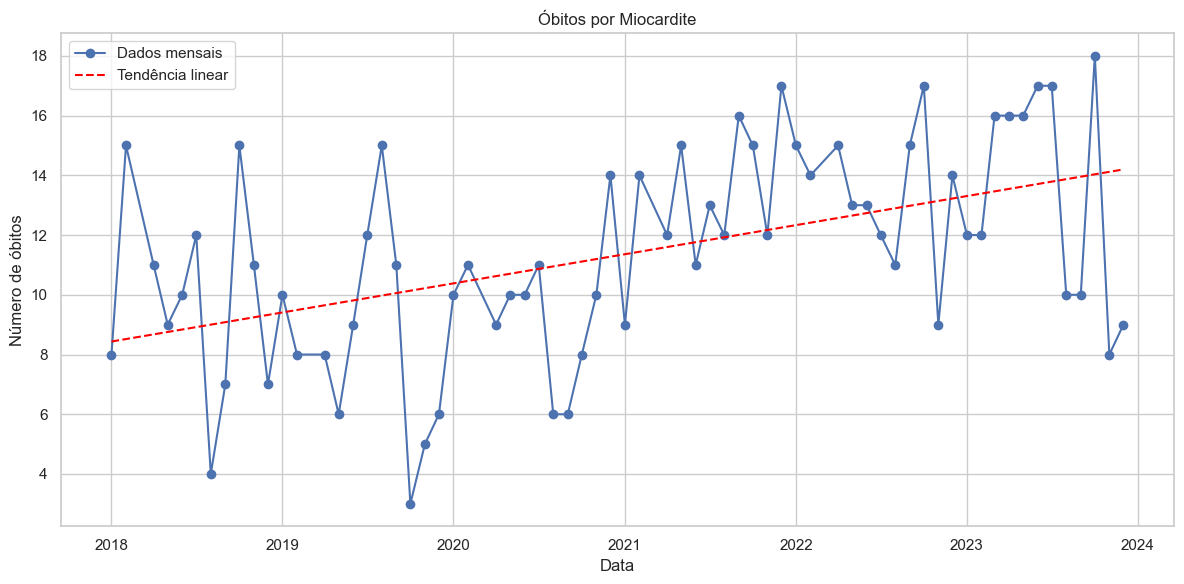

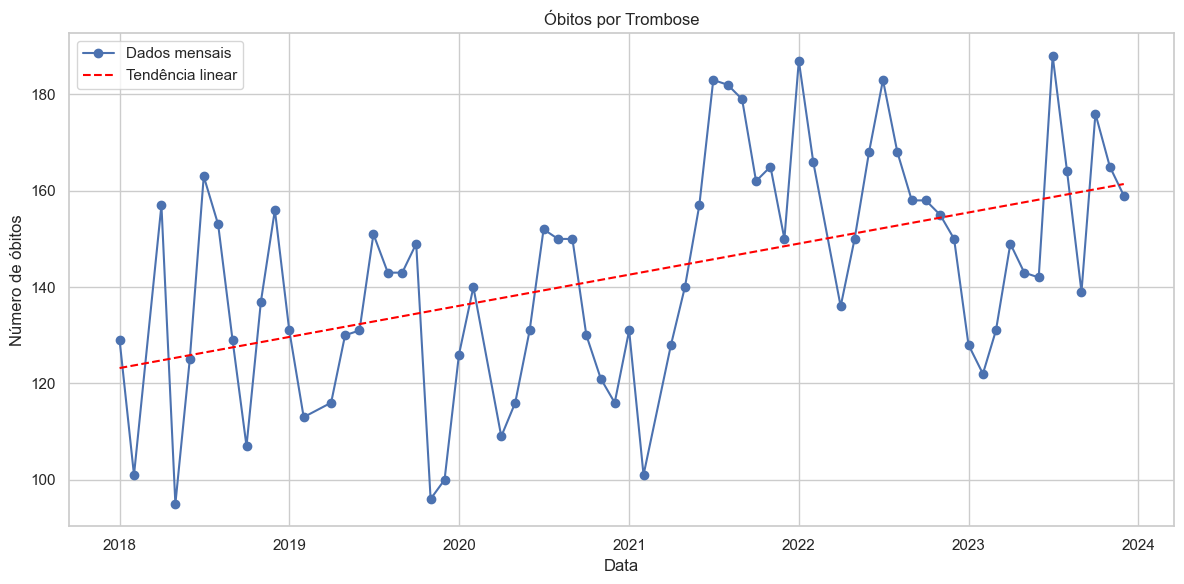

In [3]:
# Analise visual inicial dos dados de mortalidade

# Dicionário que associa nome legível à chave interna dos dados

eventos_mortalidade = {
    "AVC": "obitos_avc",
    "Infarto": "obitos_infarto",
    "Insuficiência cardíaca": "obitos_insuf_cardiaca",
    "Miocardite": "obitos_miocardite",
    "Trombose": "obitos_trombose"
}

# Gera um gráfico por evento com linha de tendência
for nome_evento, chave in eventos_mortalidade.items():
    df = dados["mortalidade"][chave].copy()
    
    # Remove linhas com valores nulos (caso existam)
    df = df.dropna(subset=["data", "Total"])
    
    # Converte as datas para números (requeridos para regressão)
    x = mdates.date2num(df["data"])
    y = df["Total"].values

    # Regressão linear (1º grau)
    coef = np.polyfit(x, y, deg=1)
    tendencia = np.poly1d(coef)

    # Gera os valores da linha de tendência
    x_tend = np.linspace(x.min(), x.max(), len(x))
    y_tend = tendencia(x_tend)

    # Plota os dados reais
    plt.plot(df["data"], y, marker="o", linestyle="-", label="Dados mensais")
    
    # Plota a linha de tendência
    plt.plot(mdates.num2date(x_tend), y_tend, color="red", linestyle="--", label="Tendência linear")

    plt.title(f"Óbitos por {nome_evento}")
    plt.xlabel("Data")
    plt.ylabel("Número de óbitos")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Análise Visual Inicial de Morbidade

Séries temporais das internações por:

- Arritmias
- AVC
- Infarto
- Trombose

Metodologia similar à usada para mortalidade, incluindo:

- Ajuste de regressão linear;
- Identificação de sazonalidade e quedas abruptas (ex: colapso hospitalar no fim de 2020).


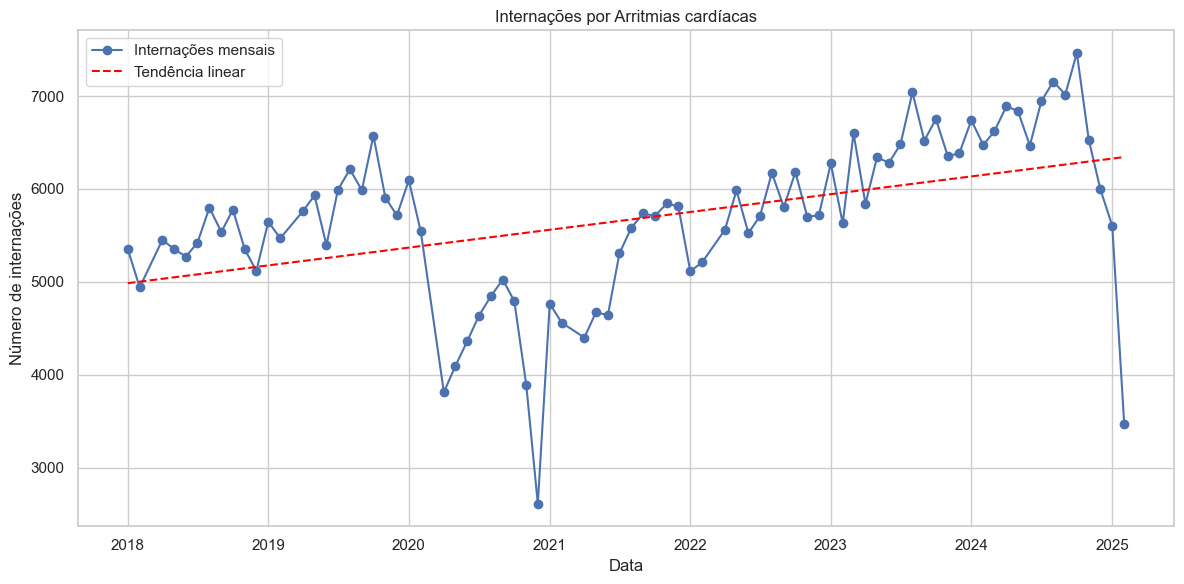

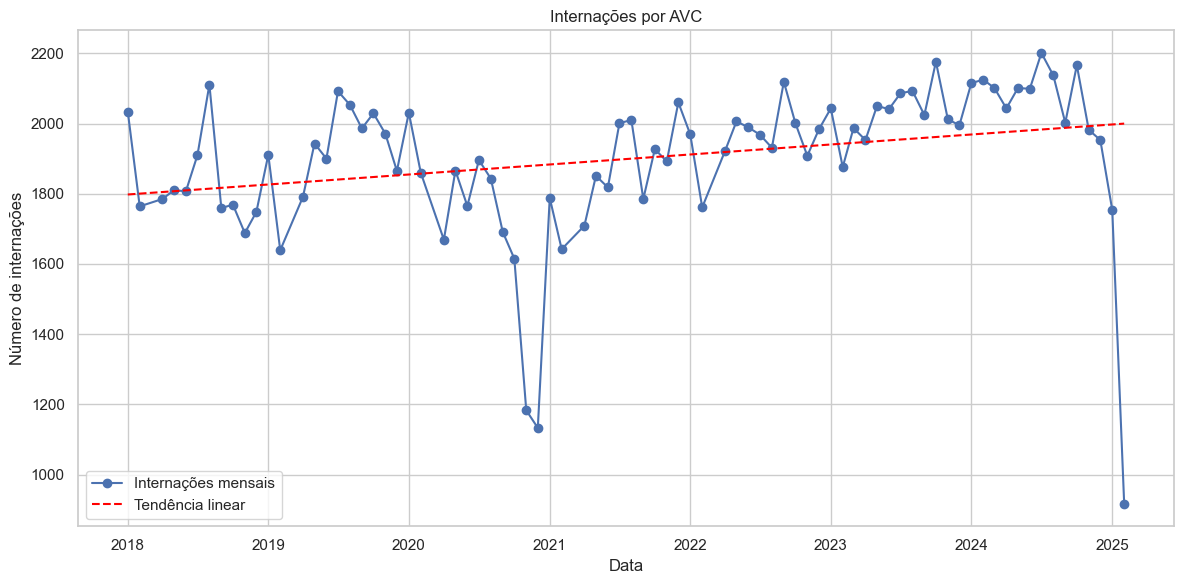

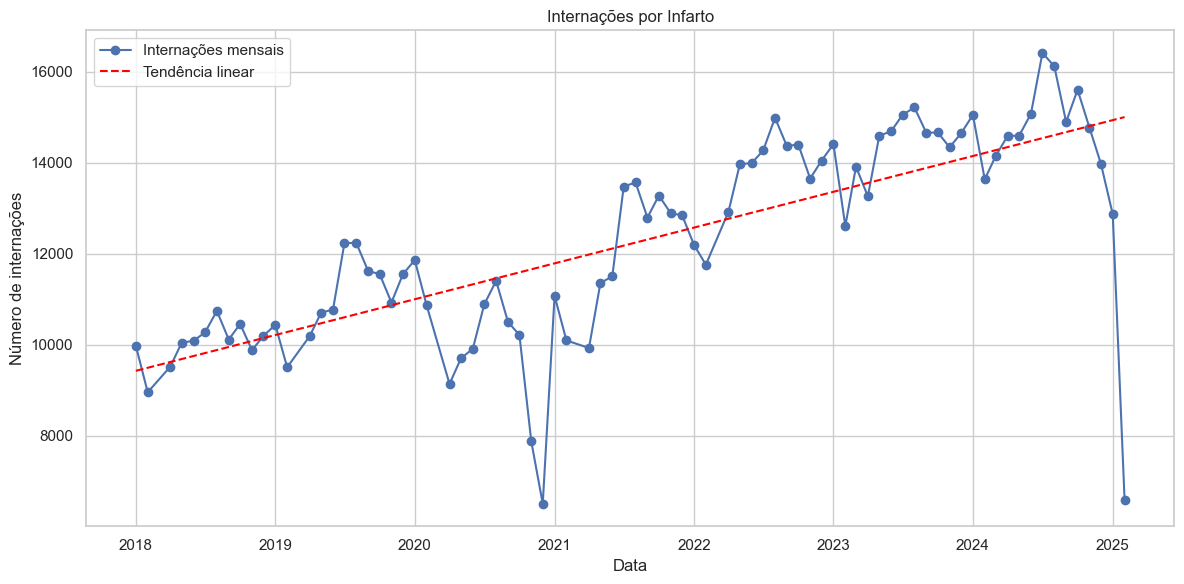

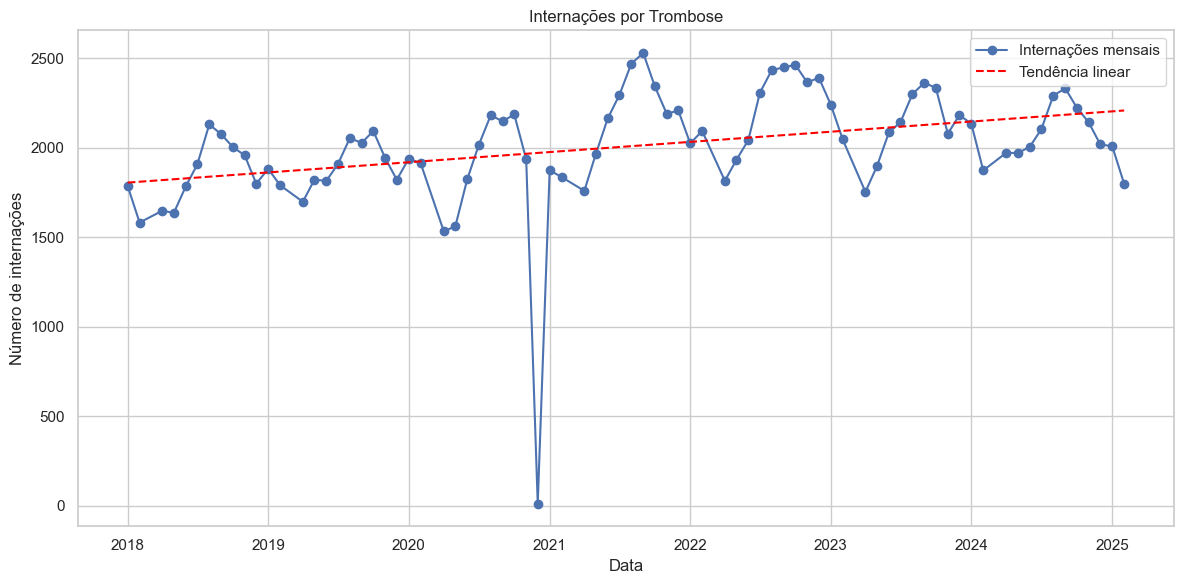

In [4]:
# Analise visual inicial dos dados de morbidade

# Dicionário que associa nome legível à chave interna dos dados de morbidade
eventos_morbidade = {
    "Internações por Arritmias cardíacas": "internacoes_arritmias_cardiacas",
    "Internações por AVC": "internacoes_avc",
    "Internações por Infarto": "internacoes_infarto",
    "Internações por Trombose": "internacoes_trombose"
}

# Gera um gráfico por evento de morbidade com linha de tendência
for nome_evento, chave in eventos_morbidade.items():
    df = dados["morbidade"][chave].copy()
    
    # Remove linhas com valores nulos
    df = df.dropna(subset=["data", "Total"])
    
    # Converte datas para números para regressão
    x = mdates.date2num(df["data"])
    y = df["Total"].values

    # Regressão linear
    coef = np.polyfit(x, y, deg=1)
    tendencia = np.poly1d(coef)

    # Gera os pontos da linha de tendência
    x_tend = np.linspace(x.min(), x.max(), len(x))
    y_tend = tendencia(x_tend)

    # Plota série temporal real
    plt.plot(df["data"], y, marker="o", linestyle="-", label="Internações mensais")

    # Plota linha de tendência
    plt.plot(mdates.num2date(x_tend), y_tend, color="red", linestyle="--", label="Tendência linear")

    plt.title(f"{nome_evento}")
    plt.xlabel("Data")
    plt.ylabel("Número de internações")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Comparativo: Pré x Durante/Pós-Pandemia

- Geração de gráficos comparativos para internações e óbitos nos periodos pré-pandemia e durante/pós pandemia;
- Inclusão de linha de tendência para cada período (regressão linear);
- As imagens geradas são salvas automaticamente nas pastas:

  - `../graficos/mortalidade`
  - `../graficos/morbidade`


Gerando gráfico: Óbitos por Avc


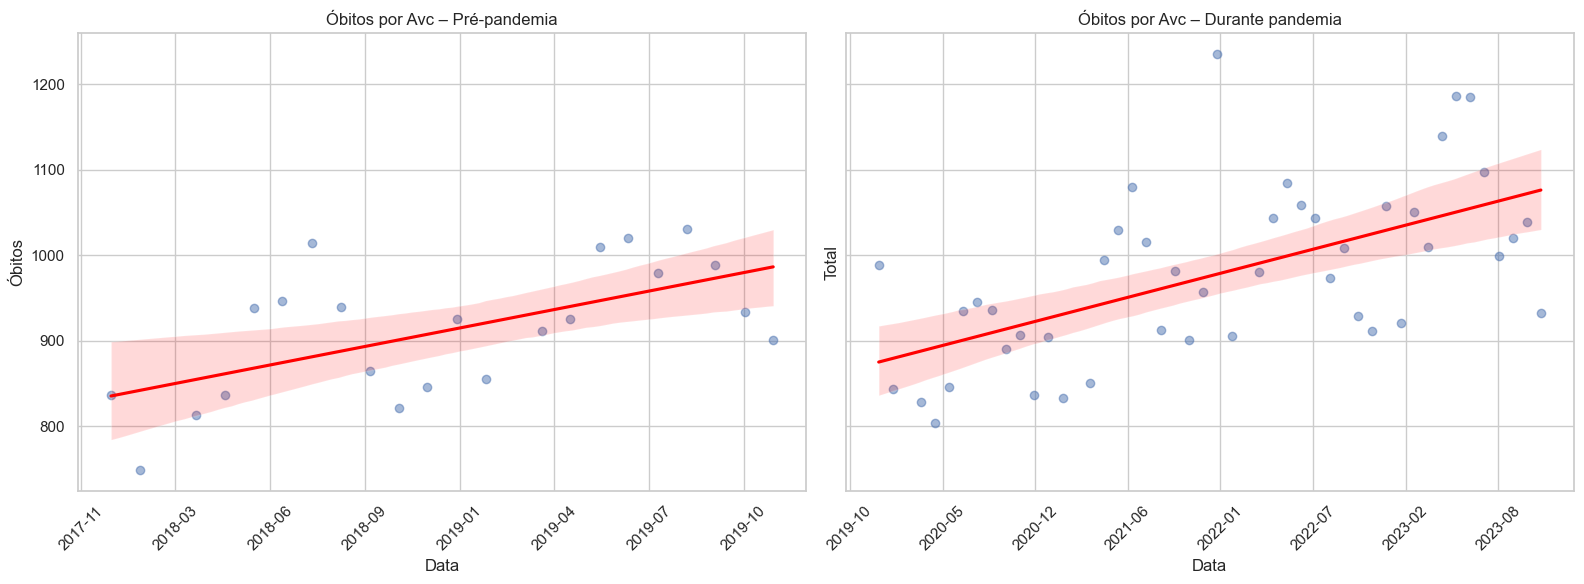

Gerando gráfico: Óbitos por Infarto


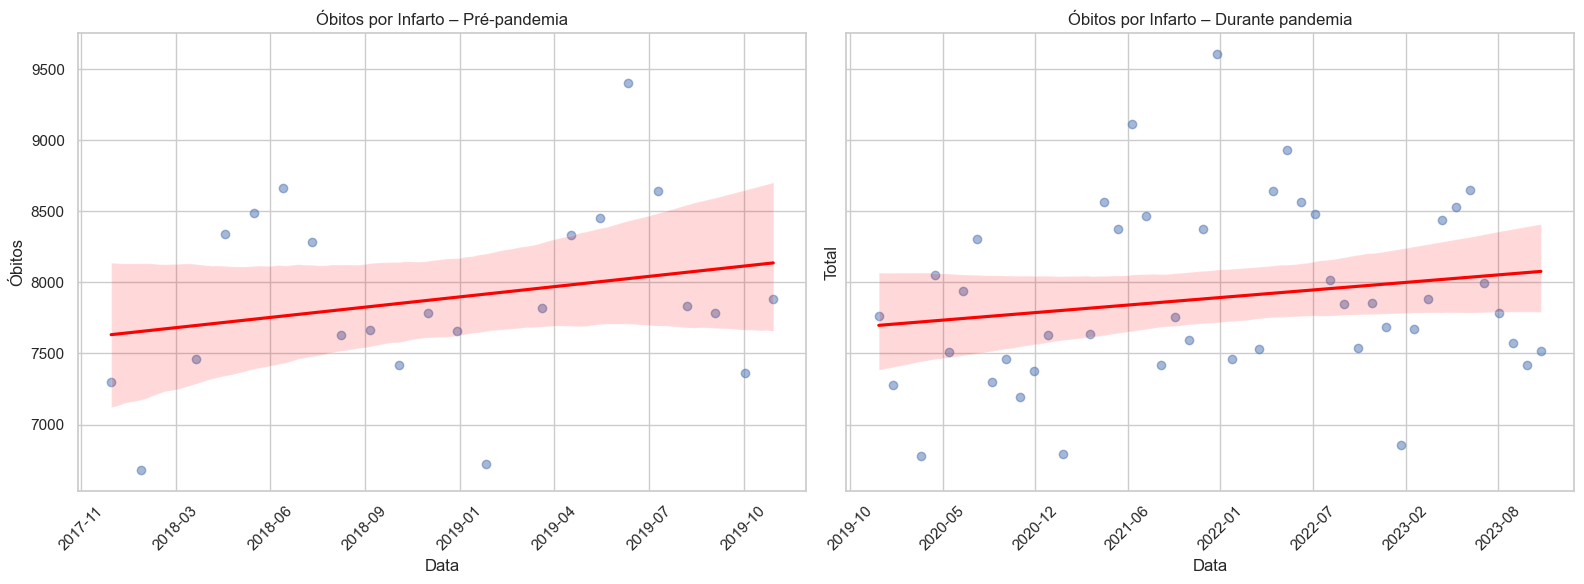

Gerando gráfico: Óbitos por Insuf Cardiaca


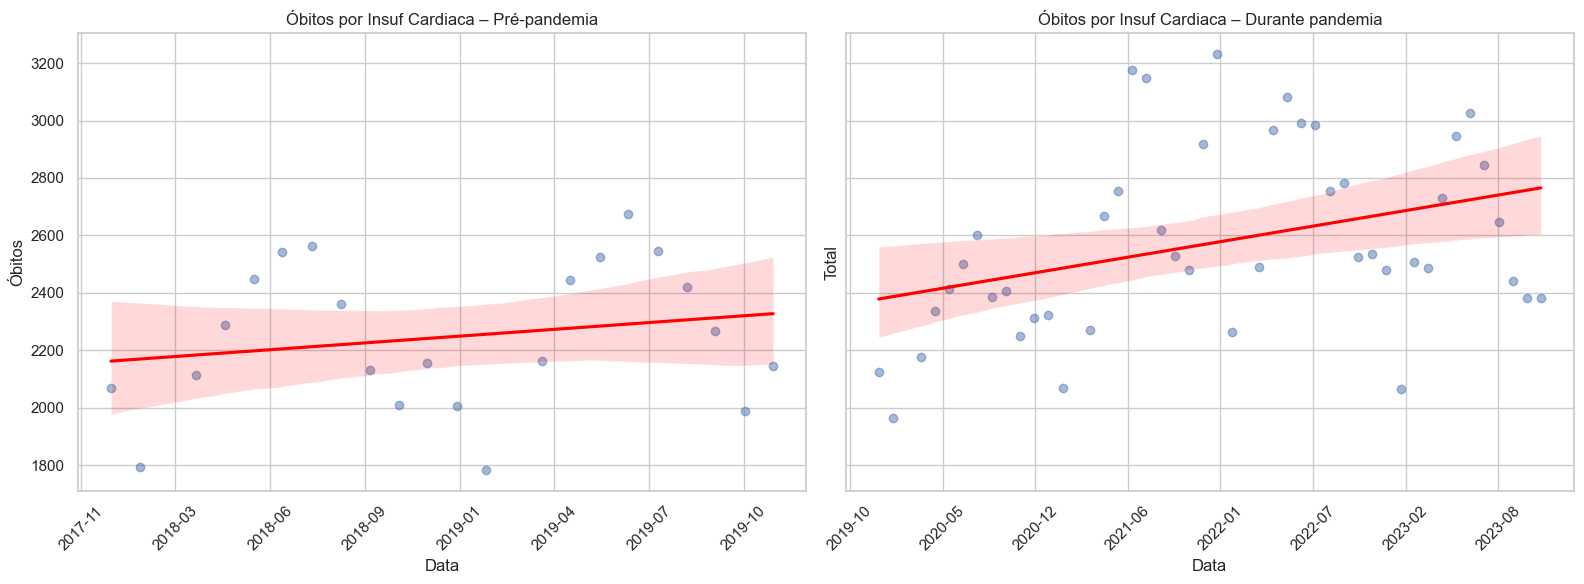

Gerando gráfico: Óbitos por Miocardite


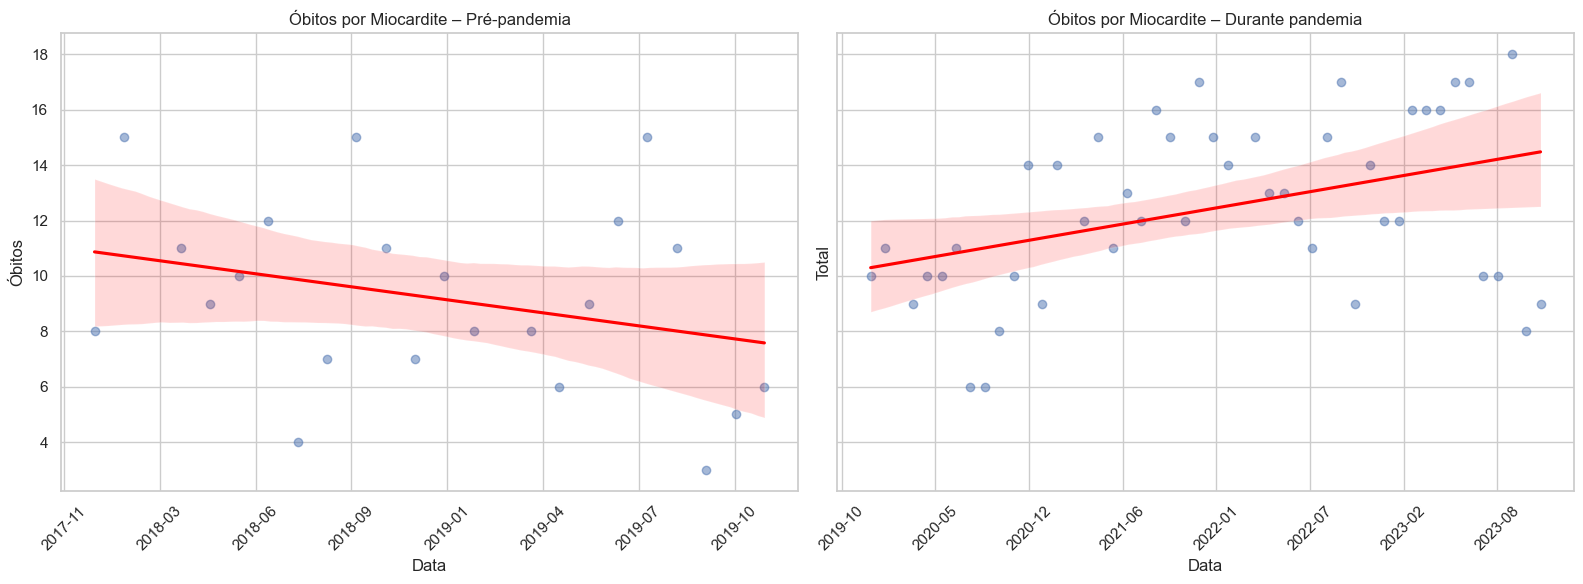

Gerando gráfico: Óbitos por Trombose


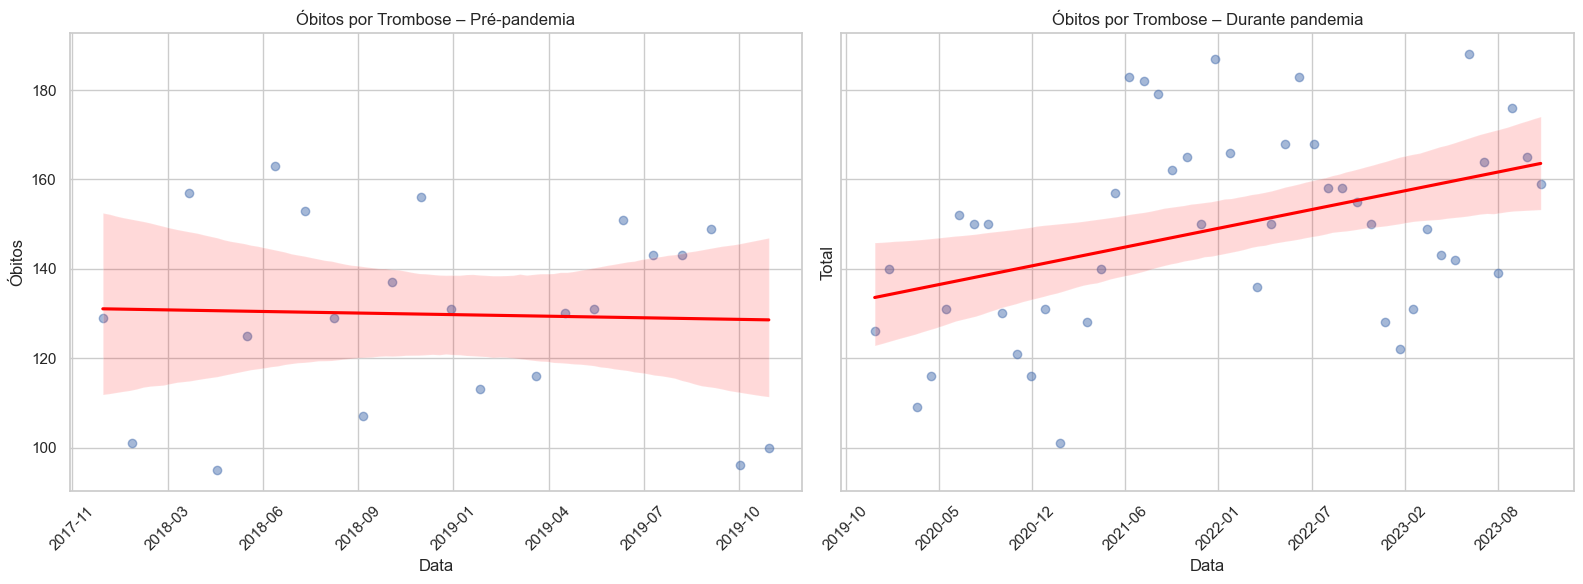

In [5]:
plotar_comparativo_eventos(
    dados["mortalidade"],
    titulo_base="Óbitos por",
    ylabel="Óbitos",
    salvar_em="../graficos/mortalidade"
)

Gerando gráfico: Internações – Arritmias Cardiacas


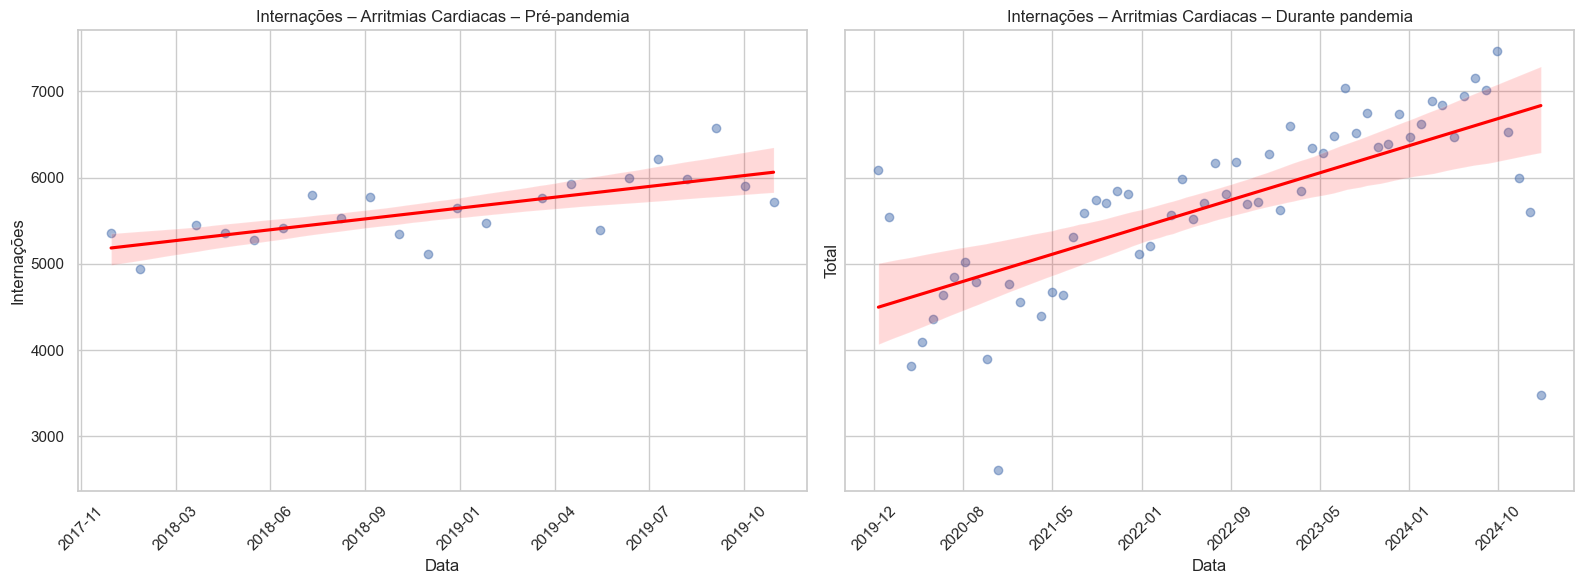

Gerando gráfico: Internações – Avc


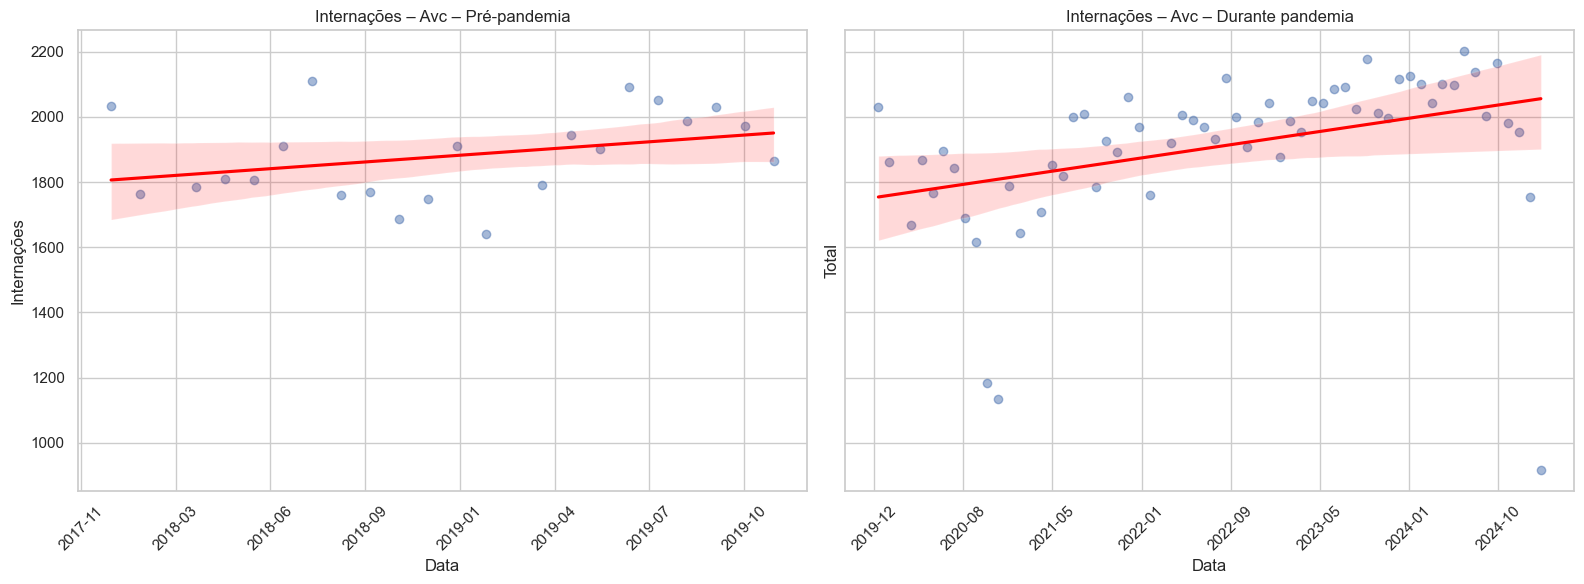

Gerando gráfico: Internações – Infarto


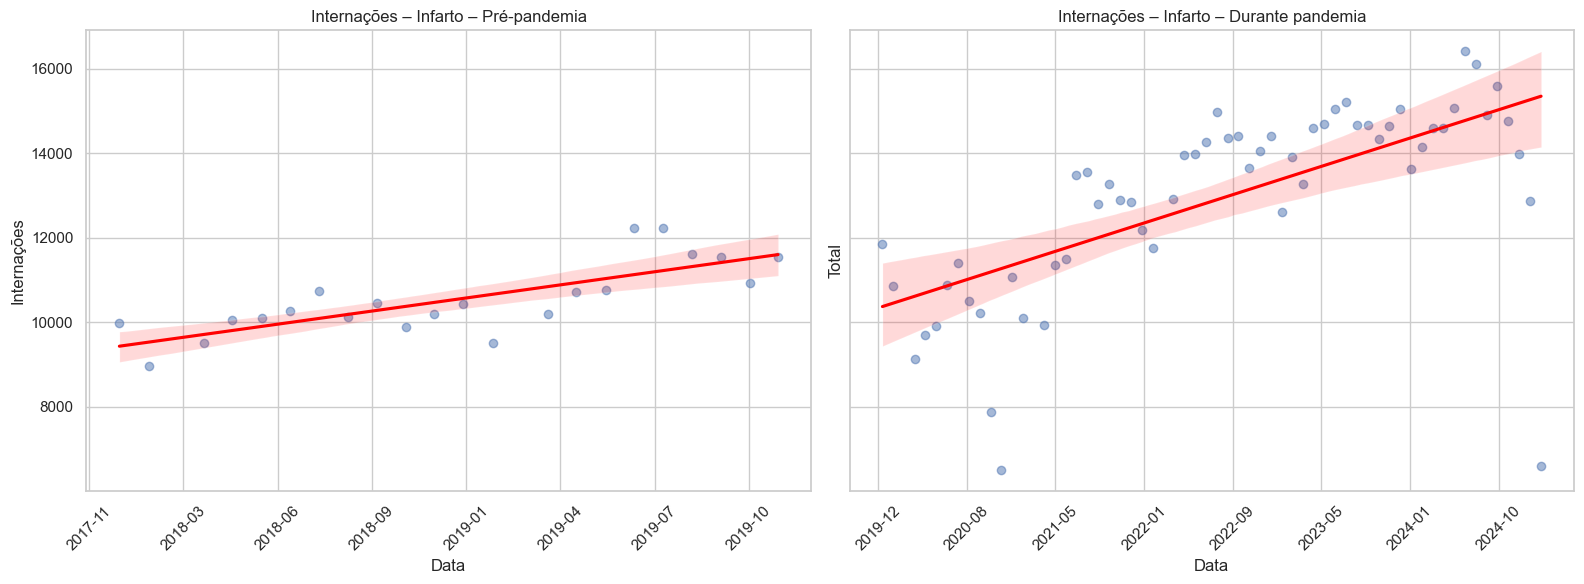

Gerando gráfico: Internações – Trombose


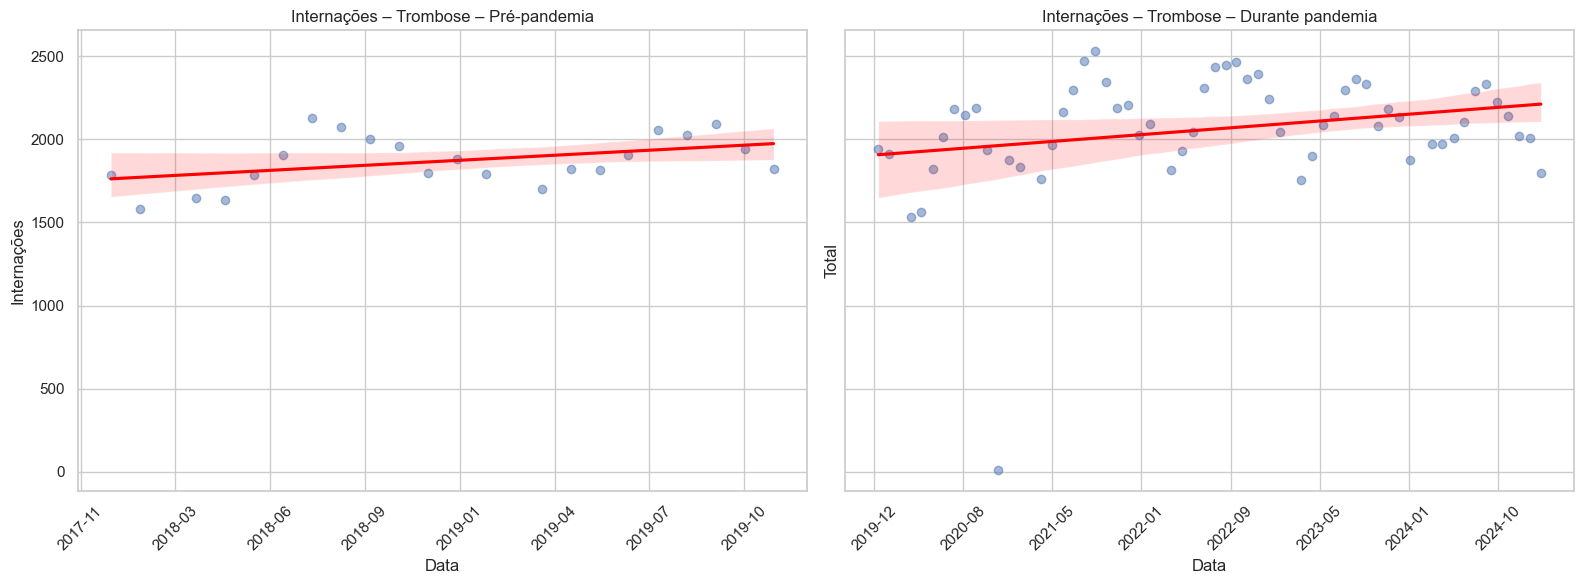

In [6]:
plotar_comparativo_eventos(
    dados["morbidade"],
    titulo_base="Internações –",
    ylabel="Internações",
    salvar_em="../graficos/morbidade"
)

## Análise Anual de Miocardite

- Agrupamento dos dados de óbitos por miocardite por ano;
- Geração de gráfico de totais anuais;
- Destaques:
  - Queda em 2019;
  - Aumento expressivo em 2021;
  - Tendência de alta em 2022 e 2023.


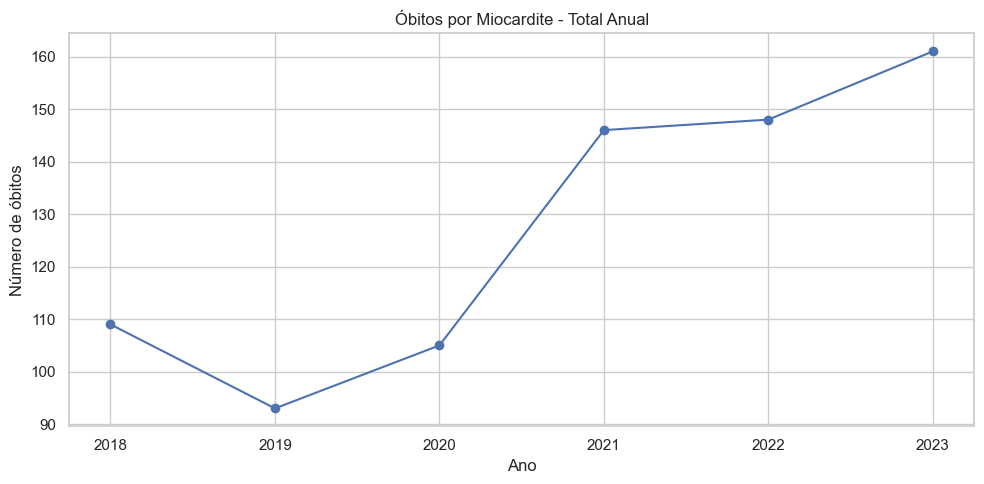

In [7]:
df = dados["mortalidade"]["obitos_miocardite"]
df["ano"] = df["data"].dt.year

# Agrupa por ano e soma apenas a coluna "Total"
obitos_anuais = df.groupby("ano")["Total"].sum()

plt.figure(figsize=(10, 5))
plt.plot(obitos_anuais.index, obitos_anuais.values, marker="o")
plt.title("Óbitos por Miocardite - Total Anual")
plt.xlabel("Ano")
plt.ylabel("Número de óbitos")
plt.grid(True)
plt.tight_layout()
plt.show()


## Coeficiente de Variação (CV): Pré x Pós-Pandemia

- Cálculo do coeficiente de variação: `CV = desvio padrão / média`;
- Separação por período:
  - Antes de 01/01/2020 (pré-pandemia);
  - Após 01/01/2020 (durante/pós-pandemia);

- Os valores calculados ajudam a quantificar a **instabilidade relativa** das séries ao longo do tempo.


In [8]:
# Calcula o CV pré e pós-pandemia para todos os eventos

data_corte = pd.to_datetime("2020-01-01")

for categoria in ["morbidade", "mortalidade"]:
    print(f"\n=== {categoria.upper()} ===")
    for nome, df in dados[categoria].items():
        df = df.dropna(subset=["data", "Total"])
        dados_pre = df[df["data"] < data_corte]
        dados_pos = df[df["data"] >= data_corte]
        std_pre = dados_pre["Total"].std()
        std_pos = dados_pos["Total"].std()
        media_pre = dados_pre["Total"].mean()
        media_pos = dados_pos["Total"].mean()
        cv_pre = std_pre / media_pre if media_pre != 0 else float("nan")
        cv_pos = std_pos / media_pos if media_pos != 0 else float("nan")
        print(f"\n--- {nome} ---")
        print(f"CV - Pré-pandemia: {cv_pre:.3f}")
        print(f"CV - Pós-pandemia: {cv_pos:.3f}")


=== MORBIDADE ===

--- internacoes_arritmias_cardiacas ---
CV - Pré-pandemia: 0.067
CV - Pós-pandemia: 0.176

--- internacoes_avc ---
CV - Pré-pandemia: 0.072
CV - Pós-pandemia: 0.126

--- internacoes_infarto ---
CV - Pré-pandemia: 0.082
CV - Pós-pandemia: 0.174

--- internacoes_trombose ---
CV - Pré-pandemia: 0.083
CV - Pós-pandemia: 0.173

=== MORTALIDADE ===

--- obitos_avc ---
CV - Pré-pandemia: 0.085
CV - Pós-pandemia: 0.103

--- obitos_infarto ---
CV - Pré-pandemia: 0.082
CV - Pós-pandemia: 0.077

--- obitos_insuf_cardiaca ---
CV - Pré-pandemia: 0.113
CV - Pós-pandemia: 0.124

--- obitos_miocardite ---
CV - Pré-pandemia: 0.372
CV - Pós-pandemia: 0.249

--- obitos_trombose ---
CV - Pré-pandemia: 0.163
CV - Pós-pandemia: 0.147


## Conclusões após Análise do CV

- A variabilidade das internações aumentou após a pandemia;
  
- A mortalidade se manteve relativamente estável em termos de dispersão;
  
- O aumento do CV para morbidade sugere maior instabilidade hospitalar durante a pandemia;
  
- No caso da miocardite, como os óbitos por miocardite são eventos raros e os dados têm baixa granularidade, pequenas flutuações podem inflar artificialmente o CV, sendo necessário interpretar os resultados com cautela.